# Q-Agent PlayGrounds
---
Use this Notebook to easily run different experiments using variable numbers of different classes of agents.

Start with importing necessary packages, modules:

In [2]:
import sys
sys.path.append('.')
import gym
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import warnings
import random
import os
import pickle
# pandas setting warnings can be ignored, as it is intendend often
warnings.simplefilter("ignore")

from QLearningAgents import QLearningBuyer, QLearningSeller
from RandOfferAgents import RandOfferBuyer, RandOfferSeller
from RandInterAgents import RandInterBuyer, RandInterSeller
from utils import *

from environments import MarketEnvironment
from info_settings import BlackBoxSetting
from matchers import RandomMatcher

## Experiment Metrics
---
Define the experiment, Setup the market environment

In [28]:
#Number of Episodes
n_episodes = 40000
#Interval to print statistics
n_stats = n_episodes/100 # could also be n_episodes/100 or similar
#Negative reward for q-learning when agent is not yet done in Episode
negative_reward = -1

    
# Get Agents with defined:
# Reservation prices
# Starting/Default prices
# Number of different classes of sellers and buyers
buyers, sellers, inequality, q_learn_agents = get_agents_equal(sellr_reserve = 20, buyer_reserve = 100,
                                                           sellr_default = 100, buyer_default = 20,
                                                           n_rnd_off_buyers = 0, n_rnd_off_sellrs = 0,
                                                           n_rnd_int_buyers = 0, n_rnd_int_sellrs = 0,
                                                           n_q_learn_buyers = 5, n_q_learn_sellrs = 5)

dir_path = f'{n_episodes}_{n_stats}_B{len(buyers)}_S{len(sellers)}_Q{len(q_learn_agents)}'
if not os.path.exists(dir_path):
    os.mkdir(dir_path)
    
market_env = MarketEnvironment(sellers=sellers, buyers=buyers, max_steps=30,  
                               matcher=RandomMatcher(reward_on_reference=True), setting=BlackBoxSetting)

In [3]:
%%time

for i in range(5):
    steps_list = learn(market_env, buyers, sellers, q_learn_agents, n_episodes, n_stats, negative_reward, inequality)
    with open(f'{dir_path}/{i}buyers.pkl', 'wb') as f:
        pickle.dump(buyers, f)
    with open(f'{dir_path}/{i}sellers.pkl', 'wb') as f:
        pickle.dump(sellers, f)
    with open(f'{dir_path}/{i}steps.pkl', 'wb') as f:
        pickle.dump(steps_list, f)

Episode 40000: Steps=1.38
B[q0]: Rewards=35.72
B[q1]: Rewards=32.4
B[q2]: Rewards=37.56
B[q3]: Rewards=36.46
B[q4]: Rewards=31.7
S[q0]: Rewards=35.06
S[q1]: Rewards=34.88
S[q2]: Rewards=31.84
S[q3]: Rewards=35.16
S[q4]: Rewards=31.4
CPU times: user 3h 2min 37s, sys: 11.6 s, total: 3h 2min 49s
Wall time: 3h 2min 24s


## Plot Averaged Results, Q Tables
---
* Buyer Rewards, Seller Rewards
* Steps per Episode
* Q Tables

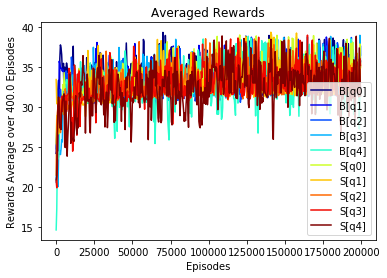

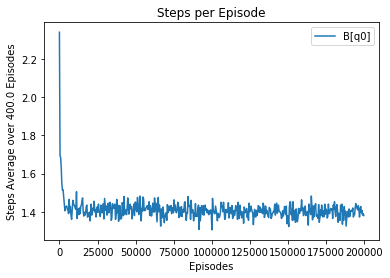

[<QLearningAgents.QLearningBuyer object at 0x7fa43b20d390>, <QLearningAgents.QLearningBuyer object at 0x7fa43b20df50>, <QLearningAgents.QLearningBuyer object at 0x7fa43b20dc90>, <QLearningAgents.QLearningBuyer object at 0x7fa43b20db90>, <QLearningAgents.QLearningBuyer object at 0x7fa43b20ddd0>, <QLearningAgents.QLearningSeller object at 0x7fa43b20d490>, <QLearningAgents.QLearningSeller object at 0x7fa43b20d650>, <QLearningAgents.QLearningSeller object at 0x7fa43b20d110>, <QLearningAgents.QLearningSeller object at 0x7fa43b20d790>, <QLearningAgents.QLearningSeller object at 0x7fa43b20d8d0>]


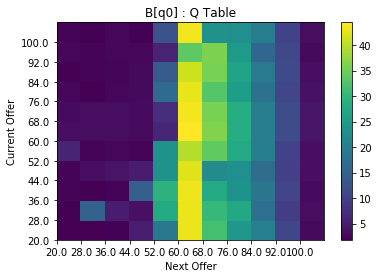

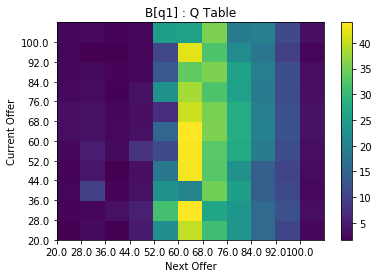

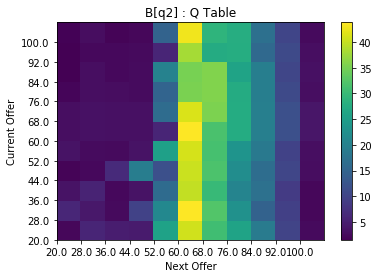

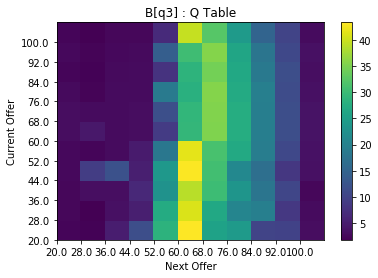

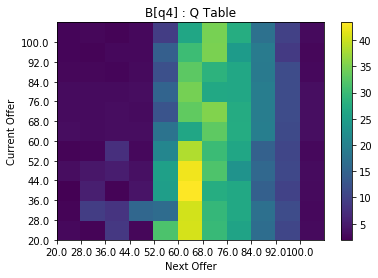

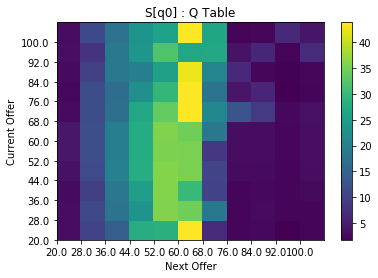

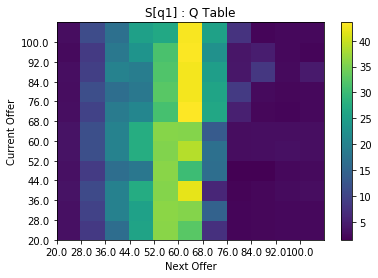

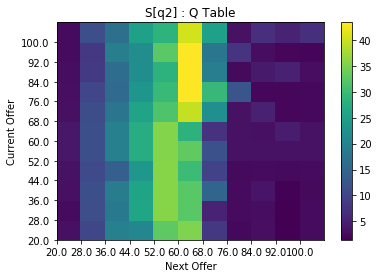

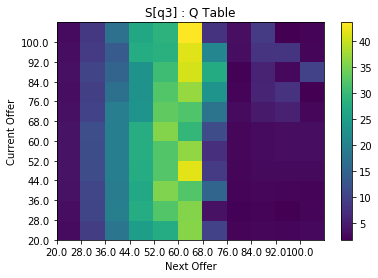

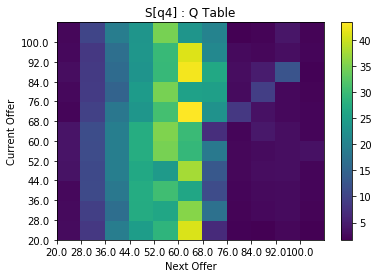

In [32]:
steps_all = []
for i in range(5):
    with open(f'{dir_path}/{i}buyers.pkl', 'rb') as f:
        buyers = pickle.load(f)
    with open(f'{dir_path}/{i}sellers.pkl', 'rb') as f:
        sellers = pickle.load(f)
    with open(f'{dir_path}/{i}steps.pkl', 'rb') as f:
        steps_list = pickle.load(f)
        
    steps_all = steps_all + steps_list 
    
plot_stats(buyers, sellers, n_stats, dir_path, steps_all)
plt.show()
        #plot_stats(buyers, n_stats)
        #plot_stats(sellers, n_stats)
print(q_learn_agents)
plot_q_tables(buyers + sellers, dir_path)
plt.show()

with open(f'{dir_path}/steps.pkl', 'wb') as f:
    pickle.dump(steps_all, f)
    
with open(f'{dir_path}/buyers.pkl', 'wb') as f:
    pickle.dump(buyers, f)
    
with open(f'{dir_path}/sellers.pkl', 'wb') as f:
    pickle.dump(sellers, f)

        #save_stats(buyers+sellers, n_stats, steps_list, dir_path)

In [5]:
pd.DataFrame(market_env.deal_history)

,Seller,Buyer,time,deal_price
0,S[q0],B[q1],0,55.337916
1,S[q4],B[q0],0,33.450666
2,S[q1],B[q3],0,38.800375
3,S[q3],B[q4],0,36.000000
4,S[q2],B[q2],1,56.085562


In [6]:
market_env.offers

,id,res_price,role,offer,time
0,S[q0],20,Seller,20.0,0
1,S[q1],20,Seller,36.0,0
2,S[q2],20,Seller,52.0,1
3,S[q3],20,Seller,36.0,0
4,S[q4],20,Seller,28.0,0
5,B[q0],100,Buyer,44.0,0
6,B[q1],100,Buyer,100.0,0
7,B[q2],100,Buyer,76.0,1
8,B[q3],100,Buyer,44.0,0
9,B[q4],100,Buyer,36.0,0


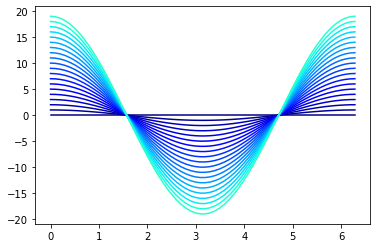

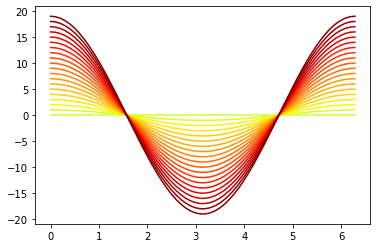

In [27]:
n = 20
colors1 = plt.cm.jet(np.linspace(0.0,0.4,n))
colors2 = plt.cm.jet(np.linspace(0.6,1.0,n))

x = np.linspace(0, 2*np.pi, 64)
y = np.cos(x)

for i in range(n):
    plt.plot(x, i*y, color=colors1[i])
plt.show()
for i in range(n):
    plt.plot(x, i*y, color=colors2[i])
plt.show()